# Image Data Generator <font color = red>flow()</font>

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist

In [25]:
((x_train,y_train),(x_test,y_test))=fashion_mnist.load_data()

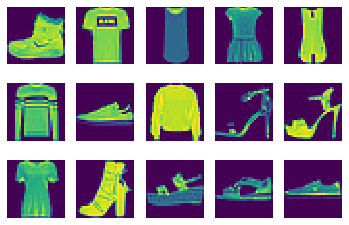

In [26]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [27]:
x_train_shape=x_train.shape
y_train_shape=y_train.shape
x_test_shape=x_test.shape
y_test_shape=y_test.shape
x_train_len=x_train_shape[0]
y_train_len=y_train_shape[0]
x_test_len=x_test_shape[0]
y_test_len=y_test_shape[0]

In [28]:
print('Total Number of data: {}'.format(x_train_len+x_test_len))
print('Number of data in test set: {}'.format(x_test_len))
print('Number of data in training set: {}'.format(x_train_len))
print('Shape of testing data x: {} and y: {}'.format(x_test_shape,y_test_shape))
print('Shape of training data x: {} and y: {}'.format(x_train_shape,y_train_shape))

Total Number of data: 70000
Number of data in test set: 10000
Number of data in training set: 60000
Shape of testing data x: (10000, 28, 28) and y: (10000,)
Shape of training data x: (60000, 28, 28) and y: (60000,)


In [29]:
data_gen_args = dict(rescale=1./255,
                     rotation_range=5,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [30]:
image_datagen = ImageDataGenerator(**data_gen_args)

In [31]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [32]:
datagen = image_datagen.flow(x_train, y_train, batch_size=64, shuffle=False)

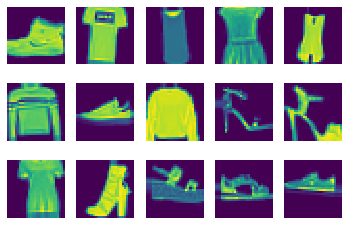

In [33]:
for x,y in datagen:
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(x[j,:,:,0])
        plt.axis('off')
    plt.show()
    break

# When we have training data and their corresponding mask
***
In segmentation problem when we have training data and their corresponding mask is present in numpy array. Then in that case we can also use <font color=red>*.flow()*</font>.

It will process both data and mask together.

- Lets consider training <font color=red>*data*</font> is <font color=red>*x_train*</font> and <font color=red>*mask*</font> is also <font color=red>*x_train*</font>.

- For segmentaion problem <font color=red>*mask*</font> should be also transformed according to corresponding <font color=red>*input data*</font>.

- We need to assign two generator saperately for <font color=red>*data*</font> and <font color=red>*mask*</font>.

- Then we need to <font color=red>*zip data*</font> and <font color=red>*mask*</font> together to maintain order between <font color=red>*data*</font> and <font color=red>*mask*</font>.

In [35]:
data_gen_args = dict(rescale=1./255,
                     rotation_range=5,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [36]:
image_datagen = ImageDataGenerator(**data_gen_args)

In [37]:
mask_datagen = ImageDataGenerator(**data_gen_args)

In [38]:
Idatagen = image_datagen.flow(x_train, batch_size=64, shuffle=False,seed=1)
mdatagen = mask_datagen.flow(x_train, batch_size=64, shuffle=False,seed=1)

In [39]:
Im=zip(Idatagen,mdatagen)

Training Data


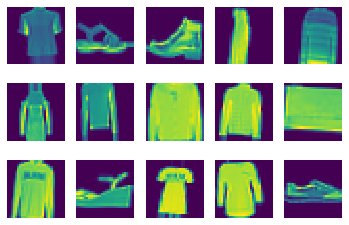

Mask Data


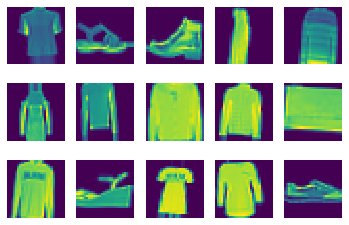

In [44]:
for x,y in Im:
    print('Training Data')
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(x[j,:,:,0])
        plt.axis('off')
    plt.show()
    print('Mask Data')
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(y[j,:,:,0])
        plt.axis('off')
    plt.show()
    break

***
Here we can see training data and mask data together in an same order and same degree of transformation.

For binary segmentation our mask should always be in binary.

For multiclass segmentation our mask should always be in categorial format. Therefore before going augmentation convert your data into categorial form.

For both binary and multiclass segmentation use preprocessing function in mask to convert its value between 0 and 1.
***

## Define your preprocessing function
***

In [46]:
def preprocessfunc(img):
    S=img.shape
    return np.round(img)

In [47]:
data_gen_args = dict(rescale=1./255,
                     rotation_range=5,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [48]:
mask_gen_args = dict(rescale=1./255,
                     rotation_range=5,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [71]:
def datagen(data_gen_args1,data_gen_args2,Batch_size=64,Shuffle=False, preprocessing=False):
    image_datagen = ImageDataGenerator(**data_gen_args1)
    mask_datagen = ImageDataGenerator(**data_gen_args2)
    Idatagen = image_datagen.flow(x_train, batch_size=Batch_size, shuffle=Shuffle,seed=1)
    mdatagen = mask_datagen.flow(x_train, batch_size=Batch_size, shuffle=Shuffle,seed=1)
    Im=zip(Idatagen,mdatagen)
    for x,y in Im:
        if preprocessing:
            y=preprocessfunc(y)
        yield(x,y)

In [72]:
data_Gen=datagen(data_gen_args, mask_gen_args, Batch_size=15,Shuffle=True, preprocessing=True)

Training Data


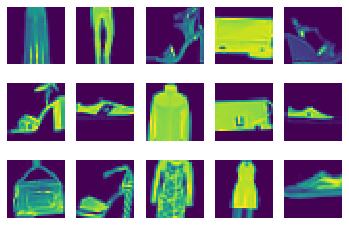

Mask Data


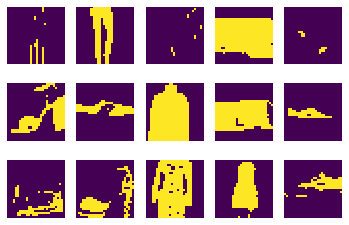

In [73]:
for x,y in data_Gen:
    print('Training Data')
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(x[j,:,:,0])
        plt.axis('off')
    plt.show()
    print('Mask Data')
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(y[j,:,:,0])
        plt.axis('off')
    plt.show()
    break

<font color=blue>If you dont want to use seperate <font color=red>*preprocessing function*</font> you can also use it with <font color=red>*imageDatagenerator*</font></font>.
### Use of preprocessing function with <font color=red>*imageDatagenerator*</font>
***

In [129]:
def preprocessfunc(img):
    S=img.shape
    #print('preprocessing completed')
    #print(np.max(img))
    #print(len(np.unique(img)))
    img=img/255
    temp=np.round(img)
    #print(len(np.unique(temp)))
    return temp

In [130]:
mask_gen_args = dict(rescale=None,
                     rotation_range=10,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     zoom_range=0.4,
                     horizontal_flip=True,
                     fill_mode='nearest',
                     preprocessing_function=preprocessfunc)

***preprocessing_function:*** function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
***
### Difference between preprocessing function with <font color=red>ImageDataGenerator</font> and without <font color=red>ImageDataGenerator</font>
***
***Preprocessing function with image data generator***
- function will run after the image is resized and augmented.
- rescale is performed after Preprocessing function

***Preprocessing function without image data generator***
- function will run after performing the all operation mentioned in image data generator.
- function will be called in through a for loop which yield the batch_size

In [131]:
data_gen_args = dict(rescale=1./255,
                     rotation_range=5,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [132]:
def datagen(data_gen_args1,data_gen_args2,Batch_size=64,Shuffle=False, preprocessing=False):
    image_datagen = ImageDataGenerator(**data_gen_args1)
    mask_datagen = ImageDataGenerator(**data_gen_args2)
    Idatagen = image_datagen.flow(x_train, batch_size=Batch_size, shuffle=Shuffle,seed=42)
    mdatagen = mask_datagen.flow(x_train, batch_size=Batch_size, shuffle=Shuffle,seed=42)
    Im=zip(Idatagen,mdatagen)
    for x,y in Im:
        yield(x,y)

In [133]:
data_Gen=datagen(data_gen_args,mask_gen_args,Batch_size=15,Shuffle=True, preprocessing=False)

Training Data


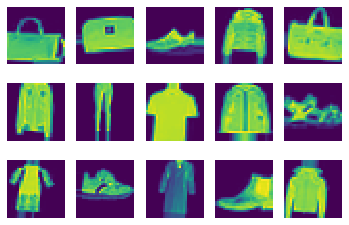

Mask Data


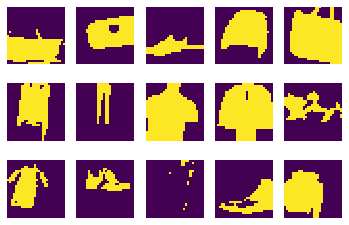

In [134]:
for x,y in data_Gen:
    print('Training Data')
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(x[j,:,:,0])
        plt.axis('off')
    plt.show()
    print('Mask Data')
    for j in range(15):
        plt.subplot(3,5,j+1)
        plt.imshow(y[j,:,:,0])
        plt.axis('off')
    plt.show()
    break